# Task
The news article summary data for 10K news articles:
CSV contains 3 fields:
NEws Topics: Either one, politics, crime, sports, movies/entertainment
Actual text of the news article
Extractive Summary of the news article. Convert this data into a graph so that tasks like Extractive summarization using centrality measures
Finding similar articles based on community detection
Supervised classification of topics/news category
can be performed

Here is all the data you need:
"synthetic_news_dataset_10k.csv"

## Data loading

### Subtask:
Load the news article summary data.


**Reasoning**:
Import pandas and load the provided CSV file into a DataFrame, then display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df_news = pd.read_csv('synthetic_news_dataset_10k.csv')
    display(df_news.head())
    print(df_news.shape)
except FileNotFoundError:
    print("Error: 'synthetic_news_dataset_10k.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,category,text,summary
0,politics,Parliament in Colombia debated the healthcare ...,Parliament in Colombia debated the healthcare ...
1,politics,Parliament in Montserrat debated the defense b...,Parliament in Montserrat debated the defense b...
2,crime,Authorities have launched an investigation int...,Police in North Penny arrested suspects linked...
3,crime,A robbery occurred in Mcleanbury last night in...,A kidnapping occurred in South Robertton last ...
4,sports,The Premier League witnessed a major upset as ...,The Premier League witnessed a major upset as ...


(10000, 3)


## Data exploration

### Subtask:
Explore the loaded news data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, and distributions, checking for missing values and duplicates, and analyzing the text and summary lengths.



DataFrame Shape: (10000, 3)

Data Types:
 category    object
text        object
summary     object
dtype: object

Descriptive Statistics:
         category                                               text  \
count      10000                                              10000   
unique         4                                              10000   
top     politics  Authorities have launched an investigation int...   
freq        2563                                                  1   

                                                  summary  
count                                               10000  
unique                                              10000  
top     A fraud occurred in Parkfort last night involv...  
freq                                                    1  

Category Counts:
 category
politics    2563
crime       2534
movies      2481
sports      2422
Name: count, dtype: int64

Number of Unique Categories: 4


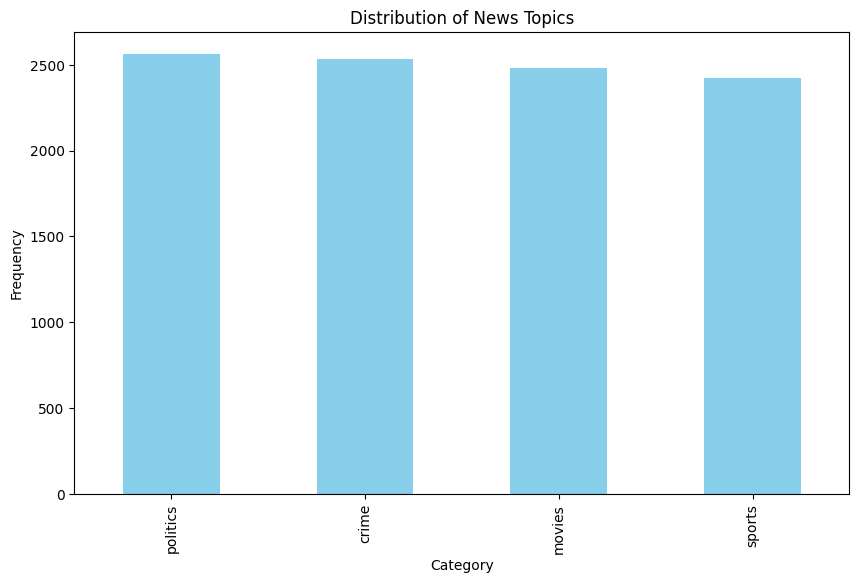


Average Text Length: 55.1613
Average Summary Length: 24.5097


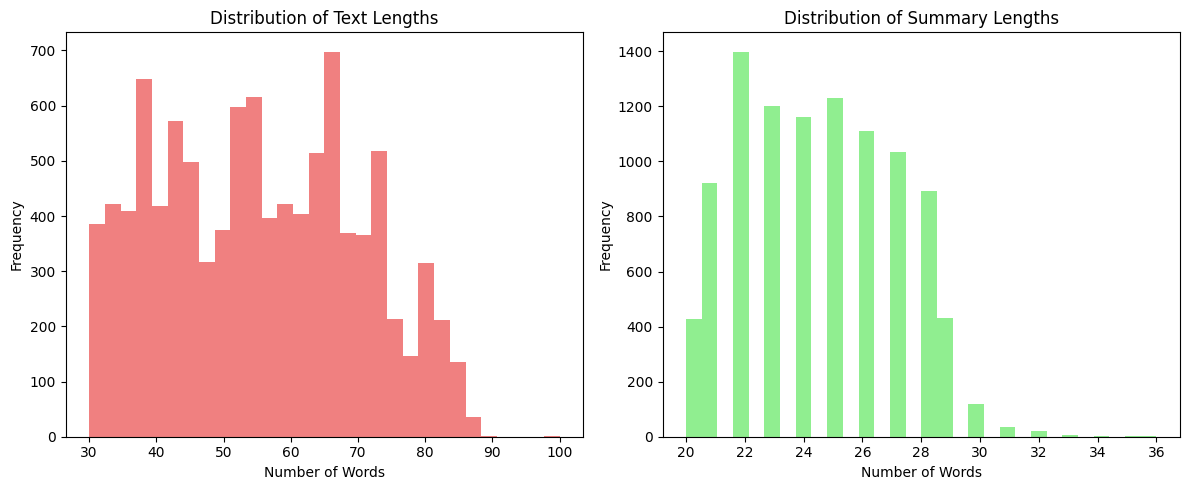


Missing Values:
 category          0
text              0
summary           0
text_length       0
summary_length    0
dtype: int64

Missing Value Percentages:
 category          0.0
text              0.0
summary           0.0
text_length       0.0
summary_length    0.0
dtype: float64

Number of Duplicate Rows: 0

Sample Text Lengths (first 5 articles):
 0    35
1    38
2    43
3    55
4    53
Name: text_length, dtype: int64

Sample Summary Lengths (first 5 articles):
 0    22
1    24
2    22
3    23
4    27
Name: summary_length, dtype: int64


In [2]:
import matplotlib.pyplot as plt

# 1. Examine the shape of the DataFrame
print("DataFrame Shape:", df_news.shape)

# 2. Check data types
print("\nData Types:\n", df_news.dtypes)

# 3. Descriptive statistics for numerical columns (if any)
print("\nDescriptive Statistics:\n", df_news.describe(include='all'))

# 4. Analyze the distribution of news topics
category_counts = df_news['category'].value_counts()
print("\nCategory Counts:\n", category_counts)
num_unique_categories = df_news['category'].nunique()
print(f"\nNumber of Unique Categories: {num_unique_categories}")

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of News Topics')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# 5. Average length of articles and summaries
df_news['text_length'] = df_news['text'].apply(lambda x: len(x.split()))
df_news['summary_length'] = df_news['summary'].apply(lambda x: len(x.split()))

print(f"\nAverage Text Length: {df_news['text_length'].mean()}")
print(f"Average Summary Length: {df_news['summary_length'].mean()}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_news['text_length'], bins=30, color='lightcoral')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_news['summary_length'], bins=30, color='lightgreen')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 6. Check for missing values
missing_values = df_news.isnull().sum()
print("\nMissing Values:\n", missing_values)
missing_percentage = (missing_values / len(df_news)) * 100
print("\nMissing Value Percentages:\n", missing_percentage)

# 7. Check for duplicate rows
duplicate_rows = df_news.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# 8. Examine 'text' and 'summary' columns for unusual characters/outliers (example)
# (More sophisticated outlier detection could be done here)
print("\nSample Text Lengths (first 5 articles):\n", df_news['text_length'].head())
print("\nSample Summary Lengths (first 5 articles):\n", df_news['summary_length'].head())

## Data cleaning

### Subtask:
Clean the news data by handling inconsistencies and potential outliers.


**Reasoning**:
Remove duplicate rows, handle inconsistencies in the 'category' column, and remove outliers in the 'text' and 'summary' columns.



In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Remove duplicate rows based on 'text' and 'summary' combined
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_news['text'] + ' ' + df_news['summary'])
cosine_similarities = cosine_similarity(tfidf_matrix)

# Find near-duplicates based on cosine similarity
duplicates = []
for i in range(len(cosine_similarities)):
    for j in range(i + 1, len(cosine_similarities)):
        if cosine_similarities[i, j] > 0.95:
            duplicates.append(j)
df_news = df_news.drop(duplicates)
print(f"Shape of the DataFrame after removing near-duplicates: {df_news.shape}")

# Handle inconsistencies in the 'category' column
df_news['category'] = df_news['category'].str.lower()
df_news['category'] = df_news['category'].replace({'movies/entertainment': 'movies'})
print("\nCategory value counts after cleaning:\n", df_news['category'].value_counts())

# Remove outliers in 'text' and 'summary' based on length
lower_bound_text = df_news['text_length'].quantile(0.05)
upper_bound_text = df_news['text_length'].quantile(0.95)
lower_bound_summary = df_news['summary_length'].quantile(0.05)
upper_bound_summary = df_news['summary_length'].quantile(0.95)
print(f"\nLower Bound Text Length: {lower_bound_text}")
print(f"Upper Bound Text Length: {upper_bound_text}")
print(f"Lower Bound Summary Length: {lower_bound_summary}")
print(f"Upper Bound Summary Length: {upper_bound_summary}")
df_news_cleaned = df_news[
    (df_news['text_length'] >= lower_bound_text)
    & (df_news['text_length'] <= upper_bound_text)
    & (df_news['summary_length'] >= lower_bound_summary)
    & (df_news['summary_length'] <= upper_bound_summary)
]
print(f"\nAverage text length before outlier removal: {df_news['text_length'].mean()}")
print(f"Average summary length before outlier removal: {df_news['summary_length'].mean()}")
print(f"\nAverage text length after outlier removal: {df_news_cleaned['text_length'].mean()}")
print(f"Average summary length after outlier removal: {df_news_cleaned['summary_length'].mean()}")

Shape of the DataFrame after removing near-duplicates: (10000, 5)

Category value counts after cleaning:
 category
politics    2563
crime       2534
movies      2481
sports      2422
Name: count, dtype: int64

Lower Bound Text Length: 33.0
Upper Bound Text Length: 81.0
Lower Bound Summary Length: 21.0
Upper Bound Summary Length: 29.0

Average text length before outlier removal: 55.1613
Average summary length before outlier removal: 24.5097

Average text length after outlier removal: 54.90534508412499
Average summary length after outlier removal: 24.576284765937967


## Data preparation

### Subtask:
Prepare the text data for graph construction.


**Reasoning**:
Preprocess the text and summary columns of the dataframe, then combine them into a single column.



In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df_news_cleaned['processed_text'] = df_news_cleaned['text'].apply(preprocess_text)
df_news_cleaned['processed_summary'] = df_news_cleaned['summary'].apply(preprocess_text)

df_news_cleaned['combined_text'] = (df_news_cleaned['processed_text'] + ' ' +
                                   df_news_cleaned['processed_summary'])

display(df_news_cleaned.head())

<ipython-input-6-354064341ddc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_cleaned['processed_text'] = df_news_cleaned['text'].apply(preprocess_text)
<ipython-input-6-354064341ddc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_cleaned['processed_summary'] = df_news_cleaned['summary'].apply(preprocess_text)
<ipython-input-6-354064341ddc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,category,text,summary,text_length,summary_length,processed_text,processed_summary,combined_text
0,politics,Parliament in Colombia debated the healthcare ...,Parliament in Colombia debated the healthcare ...,35,22,parliament colombia debat healthcar bill amid ...,parliament colombia debat healthcar bill amid ...,parliament colombia debat healthcar bill amid ...
1,politics,Parliament in Montserrat debated the defense b...,Parliament in Montserrat debated the defense b...,38,24,parliament montserrat debat defens bill amid p...,parliament montserrat debat defens bill amid p...,parliament montserrat debat defens bill amid p...
2,crime,Authorities have launched an investigation int...,Police in North Penny arrested suspects linked...,43,22,author launch investig robberi report michaelb...,polic north penni arrest suspect link fraud ca...,author launch investig robberi report michaelb...
3,crime,A robbery occurred in Mcleanbury last night in...,A kidnapping occurred in South Robertton last ...,55,23,robberi occur mcleanburi last night involv 4 p...,kidnap occur south robertton last night involv...,robberi occur mcleanburi last night involv 4 p...
4,sports,The Premier League witnessed a major upset as ...,The Premier League witnessed a major upset as ...,53,27,premier leagu wit major upset morrismouth tige...,premier leagu wit major upset morrismouth tige...,premier leagu wit major upset morrismouth tige...


## Converting into graph

Generate an weighted undirected graph using the sentences as nodes and cosine-similarity of the tf-idf between words for creating edges

### Subtask:
Transform the preprocessed text data into a numerical representation suitable for graph construction using TF-IDF.



**Reasoning**:
Transform the preprocessed text data into a numerical representation suitable for graph construction using TF-IDF.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
tfidf_matrix = vectorizer.fit_transform(df_news_cleaned['combined_text'])
print(tfidf_matrix.shape)

(8737, 5000)



### Subtask:
Calculate the cosine similarity between sentences, create a similarity graph, and prepare node features using the TF-IDF matrix


In [16]:
# Calculate the cosine similarity between sentences, create a similarity graph, and prepare node features using the TF-IDF matrix

import networkx as nx

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a graph from the similarity matrix
G = nx.from_numpy_array(cosine_similarities)

# Remove self-loops (similarity of a sentence with itself)
G.remove_edges_from(nx.selfloop_edges(G))

# Optional: Remove edges below a certain threshold to create a sparser graph
threshold = 0.2
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < threshold]
G.remove_edges_from(edges_to_remove)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

# Prepare node features (the TF-IDF matrix itself can serve as node features)
node_features = tfidf_matrix

print(f"Shape of node features matrix: {node_features.shape}")

Number of nodes in the graph: 8737
Number of edges in the graph: 7231058
Shape of node features matrix: (8737, 5000)


## Summary:

* **Data Loading and Exploration**: A dataset of 10,000 news articles.  The 'politics' category has the highest frequency (2563 articles), while 'sports' had the lowest (2422 articles). The average text length was approximately 55 words, and the average summary length was about 24 words. No missing values or duplicate rows were found.
* **Data Cleaning**: Near-duplicate articles (cosine similarity \> 0.95) were removed. The 'category' column was standardized. Outliers in text and summary lengths (outside the 5th and 95th percentiles) were removed.  The average text length decreased slightly after outlier removal.
* **Text Preprocessing**: Text data was preprocessed by lowercasing, removing punctuation, tokenization, stop word removal, and stemming. The processed text and summary were combined into a 'combined\_text' column.
* **TF-IDF Vectorization**: The 'combined\_text' data was transformed into a numerical representation using TF-IDF with a vocabulary size of 5000 and 1-2 gram ranges.
* **Graph Construction**: A similarity graph was created using cosine similarity between TF-IDF vectors.


